In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# DATASET
# https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

    g = gamma (signal):     12332
    h = hadron (background): 6688

In [4]:
# Making the columns as to be put into the data
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
# This is for reading the data
df = pd.read_csv("magic04.data", names=cols)
# df.head() # returns the first five things
# display(df)

In [5]:
df["class"].unique() # returns all the unique data in data frame

# now to convert this g,h to 0,1 (in order to understand the df)
df["class"] = (df["class"] == "g").astype(int)
# display(df)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


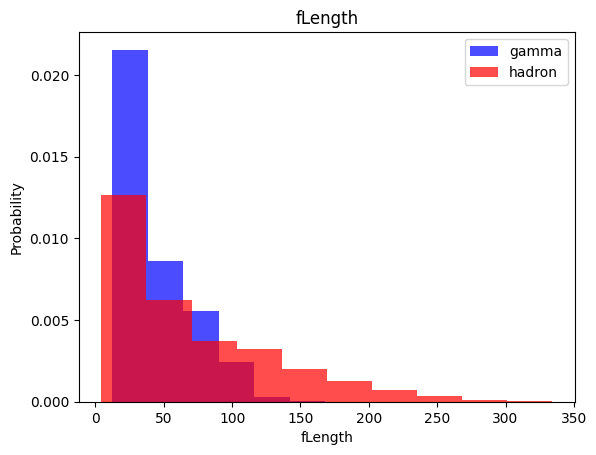

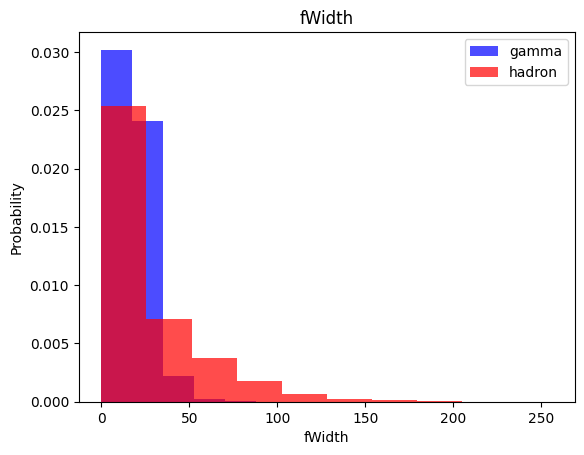

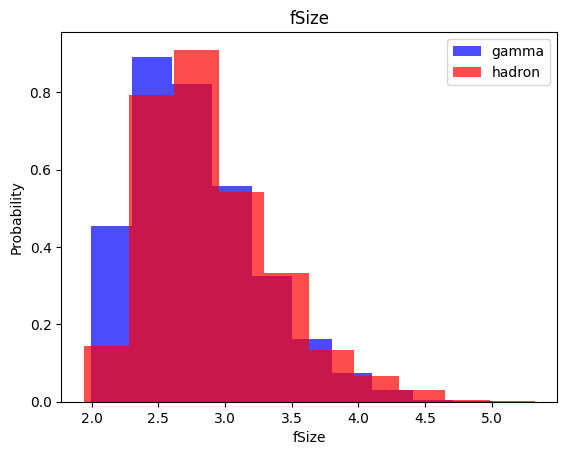

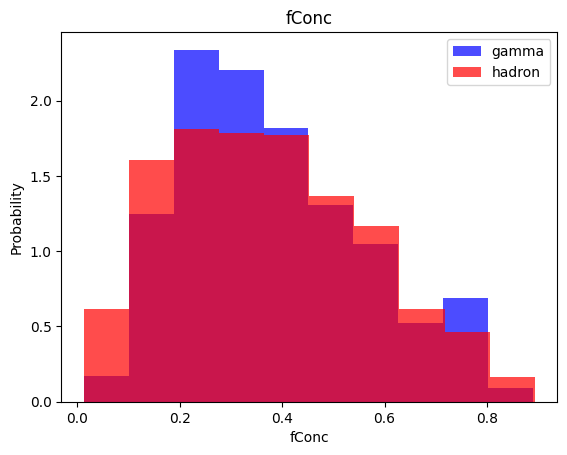

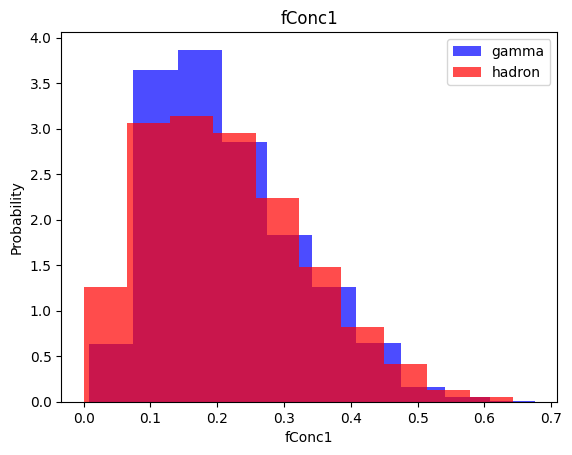

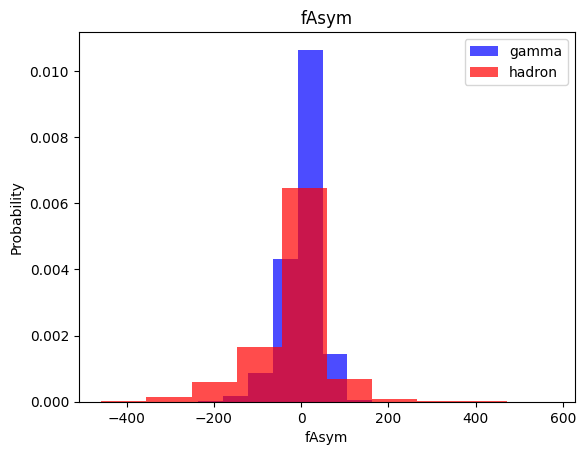

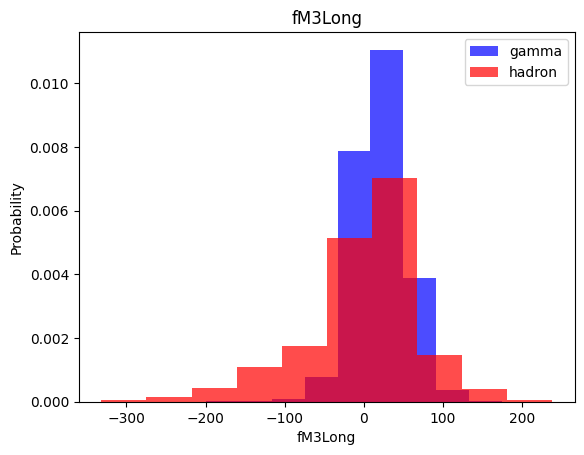

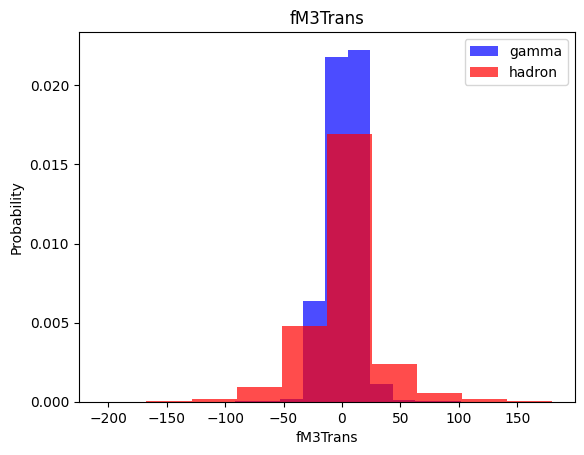

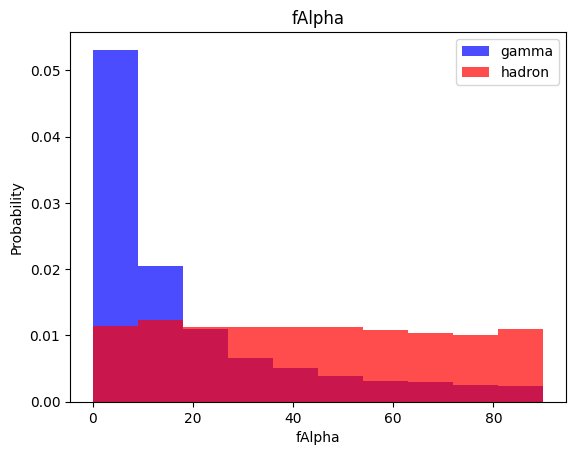

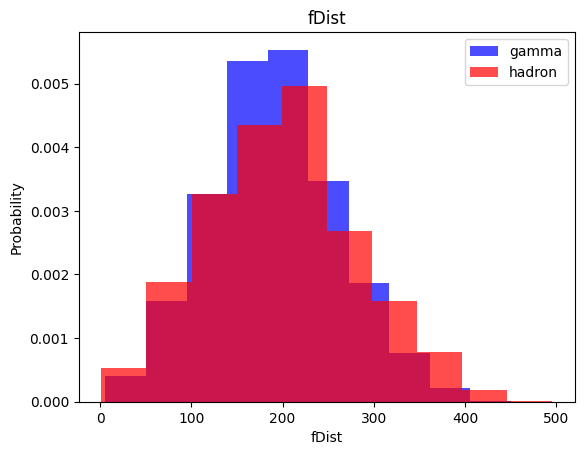

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma',  alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron',  alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation, Test Datasets

In [8]:
# Setting up the training data, validation data and the test data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
# Funtion responsible for sacling the dataset
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values #Upto the last column
    Y = dataframe[dataframe.columns[-1]].values  #Only the last column
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)
    
    data = np.hstack((X, np.reshape(Y, (-1,1))))
    
    return data, X, Y

In [10]:
# print(len(train[train["class"]==1])) # Gamma
# print(len(train[train["class"]==0])) # Hadron

In [11]:
# This will scale the dataset
train, X_train, Y_train = scale_dataset(train, oversample=True)
# Here we are not oversampling validation and test dataset as we need to be sure if our model can be trusted
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [12]:
sum(Y_test==0) # This shows no of input of a specific type

1353

In [13]:
# kNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
# Testing/Training the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
# Actually predicting the data
Y_pred = knn_model.predict(X_test)
print(Y_pred)
print(Y_test)

[1 0 1 ... 1 0 0]
[1 1 0 ... 1 0 0]


In [17]:
# printing the classification reports
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1353
           1       0.86      0.87      0.86      2451

    accuracy                           0.82      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.82      0.82      3804



In [18]:
# Naive Bayes

In [19]:
# importing naive bayes modules
from sklearn.naive_bayes import GaussianNB

In [20]:
# Initializing and fitting the dataset into nb model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [21]:
# Actually predicting the data
Y_pred = nb_model.predict(X_test)
print(Y_pred)
print(Y_test)

[1 1 1 ... 1 1 0]
[1 1 0 ... 1 0 0]


In [22]:
# printing the classification reports
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1353
           1       0.73      0.90      0.81      2451

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



In [23]:
# Logistic Regression

In [24]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
# Initializing and fitting the dataset into nb model
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
# Actually predicting the data
Y_pred = lg_model.predict(X_test)
print(Y_pred)
print(Y_test)

[0 1 1 ... 1 0 0]
[1 1 0 ... 1 0 0]


In [27]:
# printing the classification reports
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1353
           1       0.84      0.81      0.83      2451

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [28]:
# SVM - Support Vector Machine

In [29]:
# importing SVC
from sklearn.svm import SVC

In [30]:
# Initializing and fitting data into the SVC
svm_model = SVC()
svm_model.fit(X_train,Y_train)

SVC()

In [31]:
# Actually predicting the data
Y_pred =svm_model.predict(X_test)
print(Y_pred)
print(Y_test)

[1 1 1 ... 1 0 0]
[1 1 0 ... 1 0 0]


In [32]:
# printing the classification reports
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1353
           1       0.88      0.90      0.89      2451

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [33]:
# Neural Networks - Using TensorFlow

In [34]:
# importing tensorflow
import tensorflow as tf

In [42]:
# summarize history for accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# summarize history for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape =(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# here we are using 'sigmoid' activation function in the output layer as we know from the graph of sigmoid
# that our output will be 0 or 1

# in tensorflow we need to compile the tf data and we use can use any optimizer of our choice
nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

In [40]:
# Actually this is training the model
# we can set verbose = 0, in order to stop printing during the training
history = nn_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

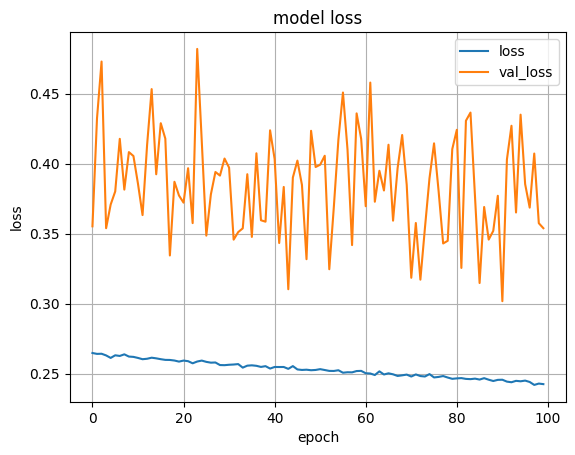

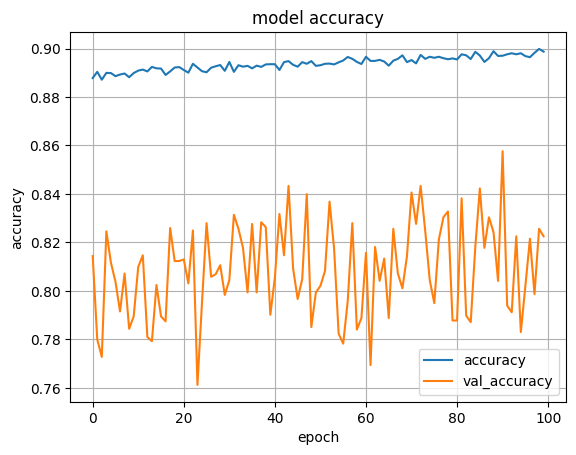

In [43]:
plot_loss(history)
plot_accuracy(history)